# Data Exploration and Distribution Plots

### Full type Distribution

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("./data/mbti-type.zip", compression="zip")

In [2]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'Well, I thought this would never happen but I..."
freq,1832,1


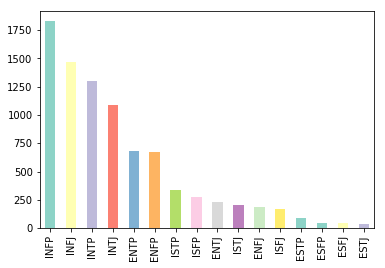

In [4]:
%matplotlib inline
import palettable
from palettable.colorbrewer.qualitative import Set3_12 as palette

df['type'].value_counts().plot(kind="bar", color=palette.mpl_colors)

### Split dichotomies for granular distribution

In [5]:
dichotomies = ["world", "information", "decisions", "structure"]

In [6]:
df[dichotomies] = df.type.apply(list).apply(pd.Series)

    

In [7]:
df.head()

,type,posts,world,information,decisions,structure
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


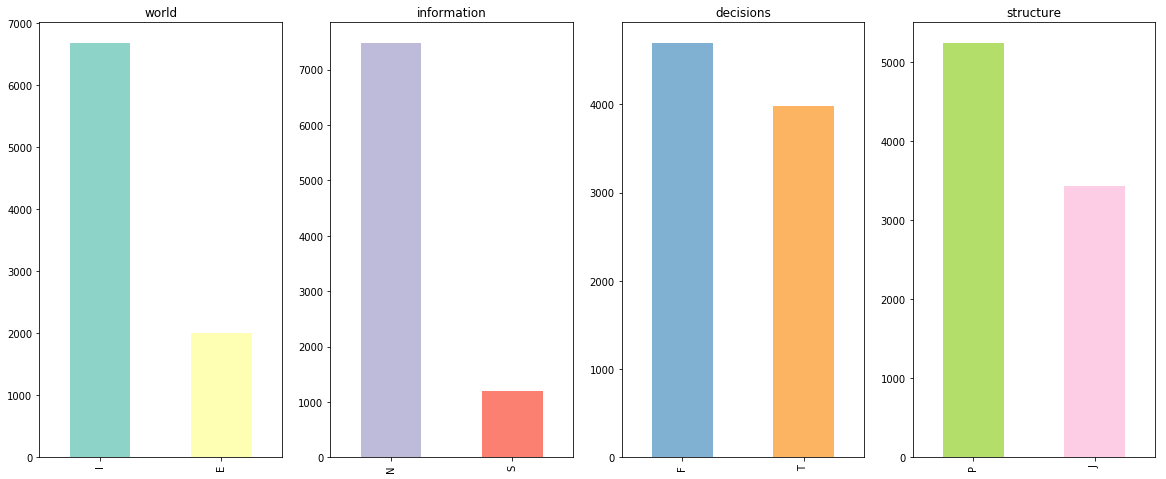

In [8]:
fig, axs = plt.subplots(1,4, figsize=(20,8))

for d, dichotomy in enumerate(dichotomies):
    df[dichotomy].value_counts().plot(kind="bar", ax=axs[d], title=dichotomy, color=palette.mpl_colors[2*d: 2*d + 2])

### Pairwise distribution

In [9]:
dich_dummies = pd.get_dummies(df[dichotomies])
dich_dummies.columns = [x.split("_")[1] for x in dich_dummies.columns]
dich_correlation = dich_dummies.corr()
dich_correlation.replace([1,-1], "X")

,E,I,N,S,F,T,J,P
E,X,X,0.0458986,-0.0458986,-0.0695728,0.0695728,-0.161939,0.161939
I,X,X,-0.0458986,0.0458986,0.0695728,-0.0695728,0.161939,-0.161939
N,0.0458986,-0.0458986,X,X,0.0809536,-0.0809536,0.014922,-0.014922
S,-0.0458986,0.0458986,X,X,-0.0809536,0.0809536,-0.014922,0.014922
F,-0.0695728,0.0695728,0.0809536,-0.0809536,X,X,0.00467333,-0.00467333
T,0.0695728,-0.0695728,-0.0809536,0.0809536,X,X,-0.00467333,0.00467333
J,-0.161939,0.161939,0.014922,-0.014922,0.00467333,-0.00467333,X,X
P,0.161939,-0.161939,-0.014922,0.014922,-0.00467333,0.00467333,X,X


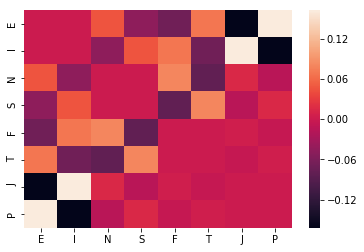

In [10]:
import seaborn as sns
import numpy as np

# replace same-letter comparisons and impossible comparisons with 0 to make the actual values easier to see
# and compare
dich_correlation = dich_correlation.replace([1,-1], 0)

sns.heatmap(dich_correlation, xticklabels=dich_correlation.columns, yticklabels=dich_correlation.columns)